In [109]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [110]:
# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print(f"x_train shape: {x_train.shape}")
print(f"y_train_cat shape: {y_train_cat.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test_cat shape: {y_test_cat.shape}")

x_train shape: (60000, 28, 28, 1)
y_train_cat shape: (60000, 10)
x_test shape: (10000, 28, 28, 1)
y_test_cat shape: (10000, 10)


In [111]:
# Define the model
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_31 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [112]:
history = model.fit(
    x_train, y_train_cat,
    batch_size=128,
    epochs=10,
    validation_data=(x_test, y_test_cat),
    verbose=1
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 103ms/step - accuracy: 0.8150 - loss: 0.6011 - val_accuracy: 0.9785 - val_loss: 0.0655
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 86s 112ms/step - accuracy: 0.9675 - loss: 0.1083 - val_accuracy: 0.9862 - val_loss: 0.0418
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 76s 100ms/step - accuracy: 0.9769 - loss: 0.0768 - val_accuracy: 0.9875 - val_loss: 0.0346
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 104ms/step - accuracy: 0.9819 - loss: 0.0598 - val_accuracy: 0.9898 - val_loss: 0.0318
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 103ms/step - accuracy: 0.9852 - loss: 0.0512 - val_accuracy: 0.9903 - val_loss: 0.0270
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 85s 110ms/step - accuracy: 0.9870 - loss: 0.0432 - val_accuracy: 0.9907 - val_loss: 0.0267
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 100ms/step - accuracy: 0.9886 - loss: 0.0351 - val_accuracy: 0.9893 - val_loss: 0.0319
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 103ms/step - accuracy: 0.9907 - loss: 0

In [113]:
loss, accuracy = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9892 - loss: 0.0312
Test Accuracy: 0.9919


In [114]:
# Make predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Display classification report
from sklearn.metrics import classification_report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 58s 7ms/step

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      1.00      1.00       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



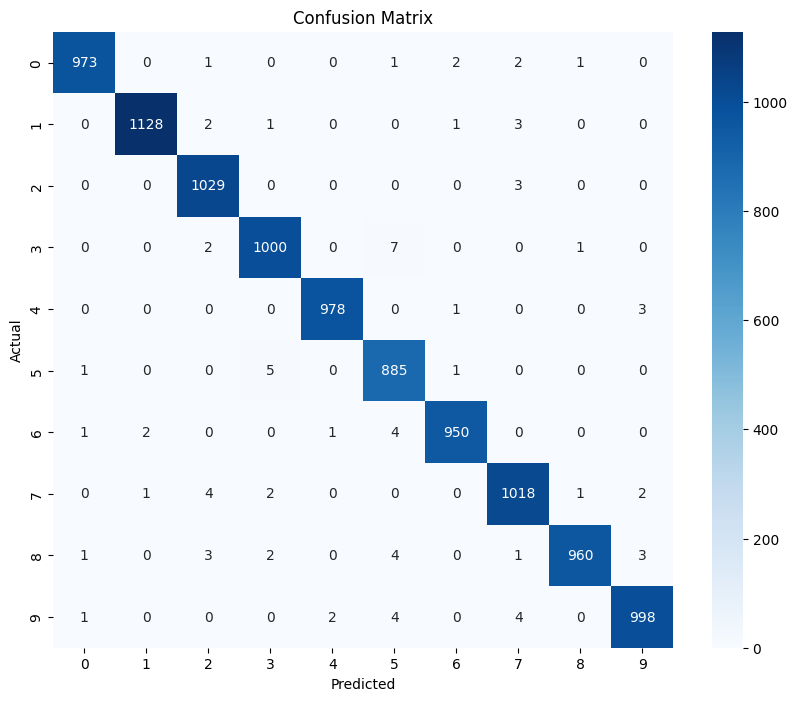

In [115]:
# Display confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


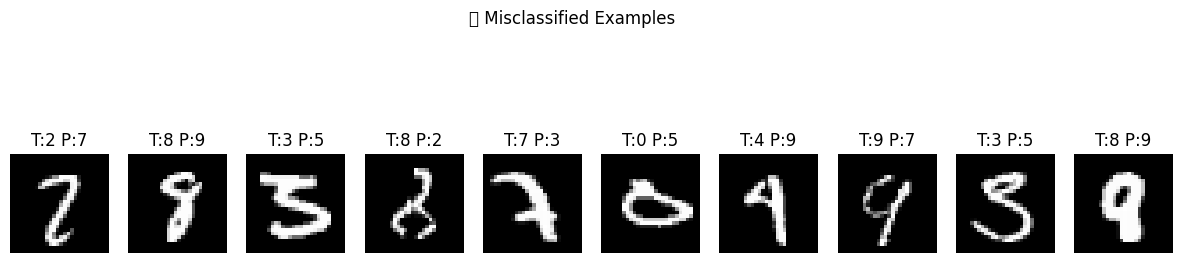

In [116]:
# Plot misclassified examples
def plot_misclassified(x, y_true, y_pred, n=10):
    misclassified = np.where(y_true != y_pred)[0]
    plt.figure(figsize=(15, 4))
    for i, wrong in enumerate(misclassified[:n]):
        plt.subplot(1, n, i + 1)
        plt.imshow(x[wrong].reshape(28, 28), cmap='gray')
        plt.title(f"T:{y_true[wrong]} P:{y_pred[wrong]}")
        plt.axis('off')
    plt.suptitle("❌ Misclassified Examples")
    plt.show()

plot_misclassified(x_test, y_test, y_pred_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step

Predicted Digit for user image: 5


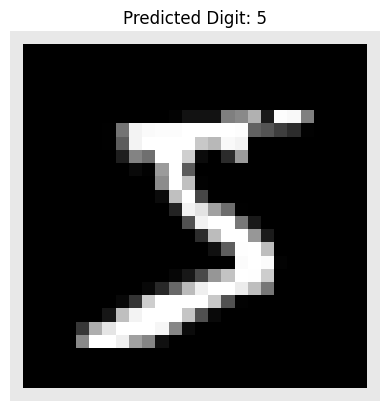

In [117]:
if 'user_img' in locals() and user_img is not None:
    user_prediction = model.predict(user_img)
    predicted_class = np.argmax(user_prediction)

    print(f"\nPredicted Digit for user image: {predicted_class}")

    plt.imshow(user_img.reshape(28, 28), cmap='gray')
    plt.title(f"Predicted Digit: {predicted_class}")
    plt.axis('off')
    plt.show()
else:
    print("User image not loaded or preprocessed correctly. Please ensure 'user_img' variable exists and is not None.")